# Data Preparation

In [201]:
import os
import pydot
import pandas as pd
import numpy as np
import math
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import graphviz
from __future__ import division, print_function, unicode_literals
%matplotlib inline
from sklearn import linear_model
import numpy as np
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import pyplot
import matplotlib.pyplot as plt
import requests as rq
import pandas as pd
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

## Loading Data

In [43]:
bankdata = pd.read_csv('C:/Users/AORAN/Downloads/BankChurners.csv')

In [268]:
bankdata_treemap.shape

(10127, 20)

In [267]:
bankdata_treemap.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [5]:
bankdata.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [182]:
bankdata1 = bankdata.copy()

In [183]:
bankdata1 = bankdata1.drop(columns=['CLIENTNUM',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'])

In [184]:
bankdata1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Correlation Matrix Preparation

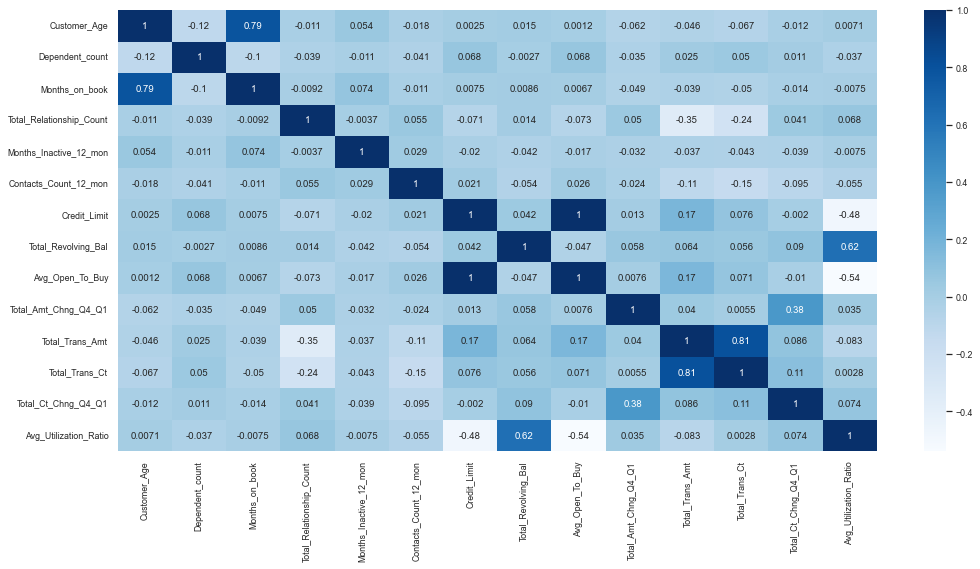

In [185]:
plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(bankdata1.corr(method='pearson'),cmap='Blues',annot=True);
plt.tight_layout()

## The Distribution of Attributes in Attrition/Not Attrition Group

### Attrition and Marital Status

In [186]:
left_customer = bankdata1[bankdata1['Attrition_Flag']=='Attrited Customer']
Existing_Customer = bankdata1[bankdata1['Attrition_Flag']=='Existing Customer']

In [187]:
bankdata_treemap = bankdata1.copy()

In [188]:
att_mapping = {'Existing Customer': 0,'Attrited Customer': 1}
bankdata_treemap['Attrition_Flag'] = bankdata_treemap['Attrition_Flag'].map(att_mapping)

In [189]:
bankdata_treemap.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [214]:
# print the number of customer who left group by Marital_Status
n = bankdata_treemap.groupby('Marital_Status')[['Attrition_Flag']].sum()
print(n)

                Attrition_Flag
Marital_Status                
Divorced                   121
Married                    709
Single                     668
Unknown                    129


In [251]:
# extract the data and labels as lists: This gives us the labels in the form of a list
a = bankdata_treemap.groupby('Marital_Status')[['Attrition_Flag']].sum().index.get_level_values(0).tolist()
print(a)

['Divorced', 'Married', 'Single', 'Unknown']


In [252]:
# get the values corresponding to these labels
d = bankdata_treemap.groupby('Marital_Status')[['Attrition_Flag']].sum().reset_index().Attrition_Flag.values.tolist()
print(d)

[121, 709, 668, 129]


In [253]:
perc = [f'{i/sum(d)*100:5.2f}%' for i in d]
lbl = [f'{el[0]} = {el[1]}' for el in zip(a, perc)]

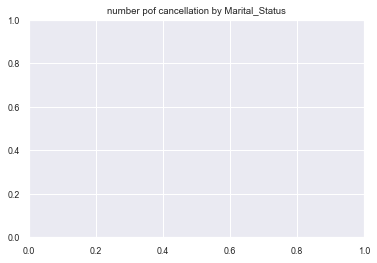

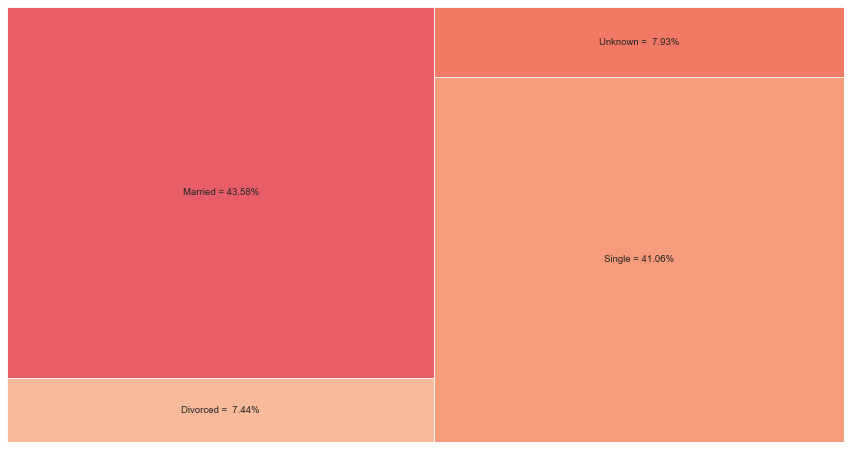

In [255]:
plt.figure(figsize=(15,8))
squarify.plot(sizes=d, label=lbl, alpha=.8)
plt.axis('off')
plt.show()

### Attrition and Education Level

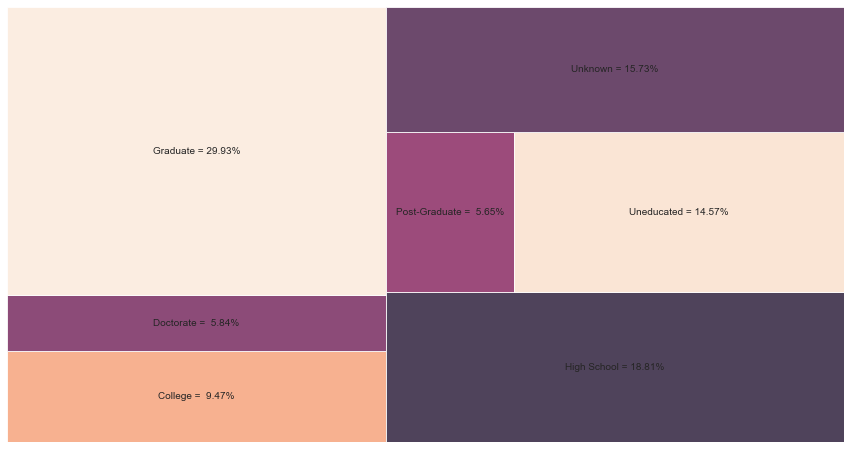

In [219]:
plt.figure(figsize=(15,8))
a = bankdata_treemap.groupby('Education_Level')[['Attrition_Flag']].sum().index.get_level_values(0).tolist()
d = bankdata_treemap.groupby('Education_Level')[['Attrition_Flag']].sum().reset_index().Attrition_Flag.values.tolist()
perc = [f'{i/sum(d)*100:5.2f}%' for i in d]
lbl = [f'{el[0]} = {el[1]}' for el in zip(a, perc)]
squarify.plot(sizes=d, label=lbl, alpha=.8)
plt.axis('off')
plt.show()

### Attrition and Gender

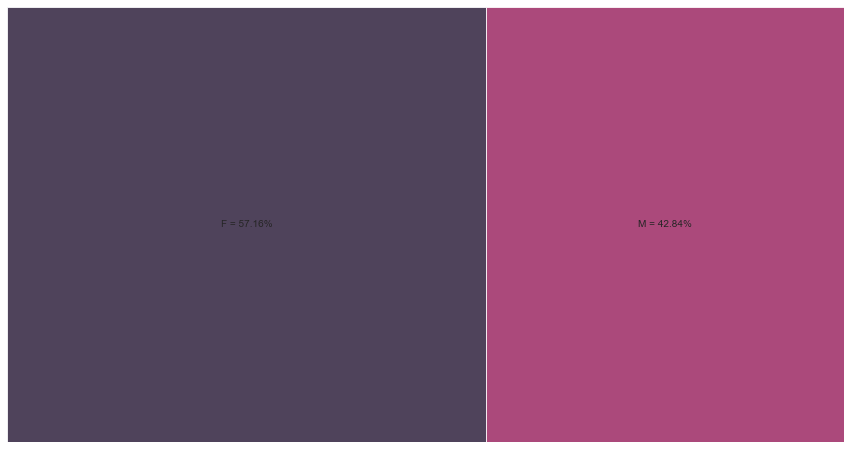

In [222]:
plt.figure(figsize=(15,8))
a = bankdata_treemap.groupby('Gender')[['Attrition_Flag']].sum().index.get_level_values(0).tolist()
d = bankdata_treemap.groupby('Gender')[['Attrition_Flag']].sum().reset_index().Attrition_Flag.values.tolist()
perc = [f'{i/sum(d)*100:5.2f}%' for i in d]
lbl = [f'{el[0]} = {el[1]}' for el in zip(a, perc)]
squarify.plot(sizes=d, label=lbl, alpha=.8)
plt.axis('off')
plt.show()

### Attrition and Income Category

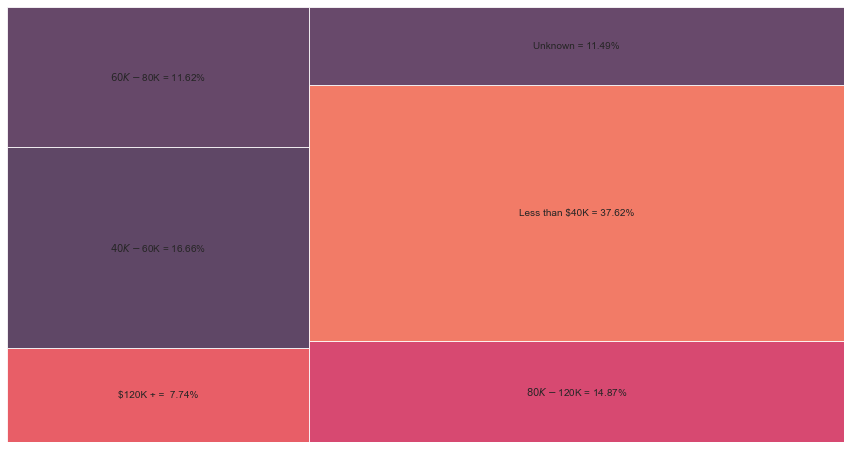

In [223]:
plt.figure(figsize=(15,8))
a = bankdata_treemap.groupby('Income_Category')[['Attrition_Flag']].sum().index.get_level_values(0).tolist()
d = bankdata_treemap.groupby('Income_Category')[['Attrition_Flag']].sum().reset_index().Attrition_Flag.values.tolist()
perc = [f'{i/sum(d)*100:5.2f}%' for i in d]
lbl = [f'{el[0]} = {el[1]}' for el in zip(a, perc)]
squarify.plot(sizes=d, label=lbl, alpha=.8)
plt.axis('off')
plt.show()

### Attrition and Card Category

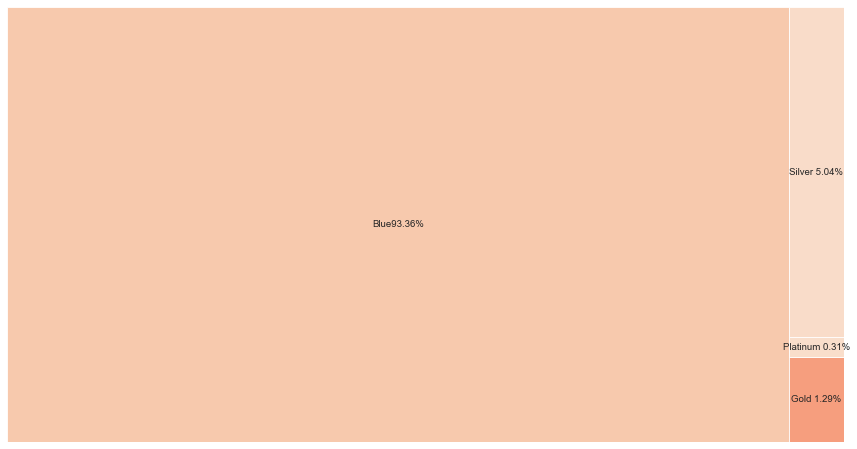

In [294]:
plt.figure(figsize=(15,8))
a = bankdata_treemap.groupby('Card_Category')[['Attrition_Flag']].sum().index.get_level_values(0).tolist()
d = bankdata_treemap.groupby('Card_Category')[['Attrition_Flag']].sum().reset_index().Attrition_Flag.values.tolist()
perc = [f'{i/sum(d)*100:5.2f}%' for i in d]
lbl = [f'{el[0]}{el[1]}' for el in zip(a, perc)]
squarify.plot(sizes=d, label=lbl, alpha=.8)
plt.axis('off')
plt.show()

### Attrition and Total_Revolving_Bal

In [231]:
bankdata.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


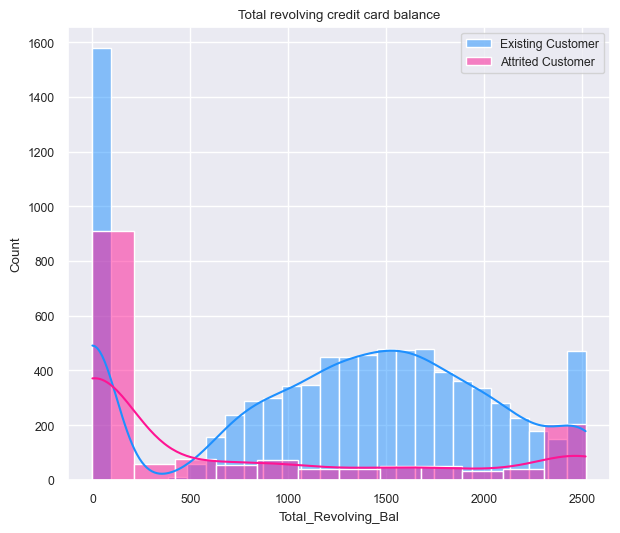

In [235]:
import seaborn as sns

plt.subplots(figsize=(7,6), dpi=100)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Existing Customer', "Total_Revolving_Bal"] , color="dodgerblue", label="Existing Customer", kde=True)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Attrited Customer', "Total_Revolving_Bal"] , color="deeppink", label="Attrited Customer", kde=True)
plt.title('Total revolving credit card balance')
plt.legend();

### Attrition and Total Transactions in the Last 12 Months

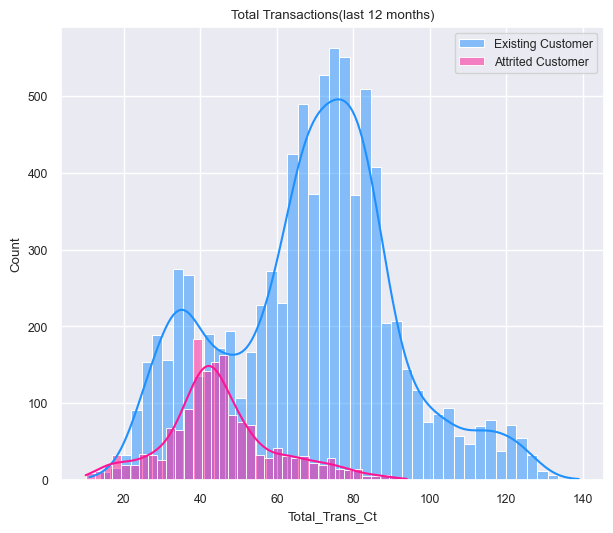

In [236]:
plt.subplots(figsize=(7,6), dpi=100)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Existing Customer', "Total_Trans_Ct"] , color="dodgerblue", label="Existing Customer", kde=True)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Attrited Customer', "Total_Trans_Ct"] , color="deeppink", label="Attrited Customer", kde=True)
plt.title('Total Transactions(last 12 months)')
plt.legend();

### Attrition and Avg_Utilization_Ratio

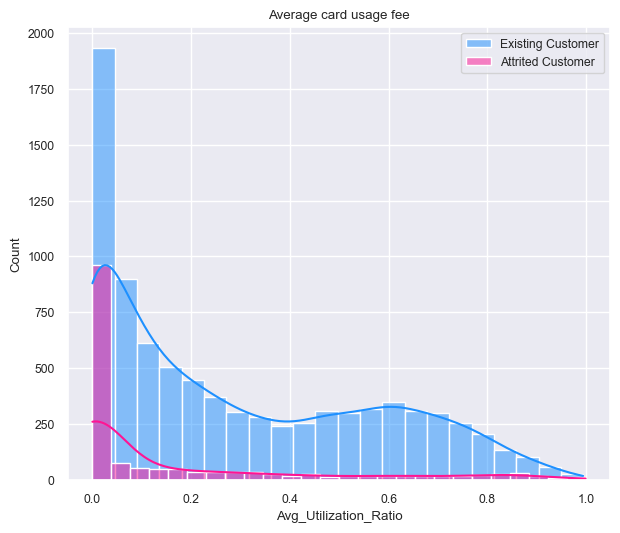

In [237]:
plt.subplots(figsize=(7,6), dpi=100)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Existing Customer', "Avg_Utilization_Ratio"] , color="dodgerblue", label="Existing Customer", kde=True)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Attrited Customer', "Avg_Utilization_Ratio"] , color="deeppink", label="Attrited Customer", kde=True)
plt.title('Average card usage fee')
plt.legend();

### Attrition and Total_Ct_Chng_Q4_Q1

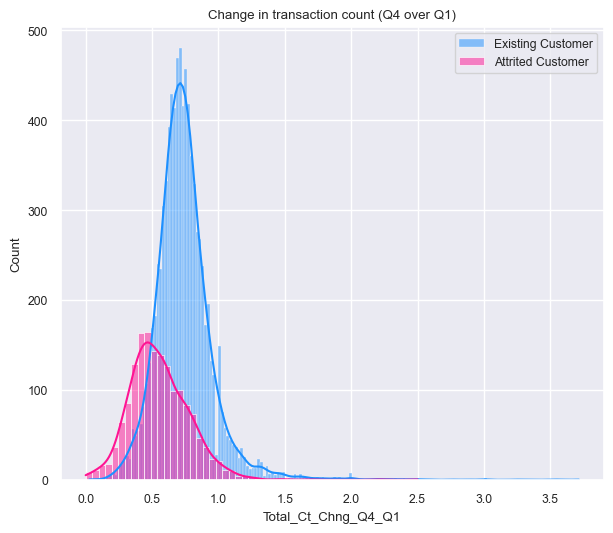

In [238]:
plt.subplots(figsize=(7,6), dpi=100)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Existing Customer', "Total_Ct_Chng_Q4_Q1"] , color="dodgerblue", label="Existing Customer", kde=True)
sns.histplot( bankdata.loc[bankdata.Attrition_Flag=='Attrited Customer', "Total_Ct_Chng_Q4_Q1"] , color="deeppink", label="Attrited Customer", kde=True)
plt.title('Change in transaction count (Q4 over Q1)')
plt.legend();

## Boxplot of Total Transactions in the Last 12 Months

No handles with labels found to put in legend.


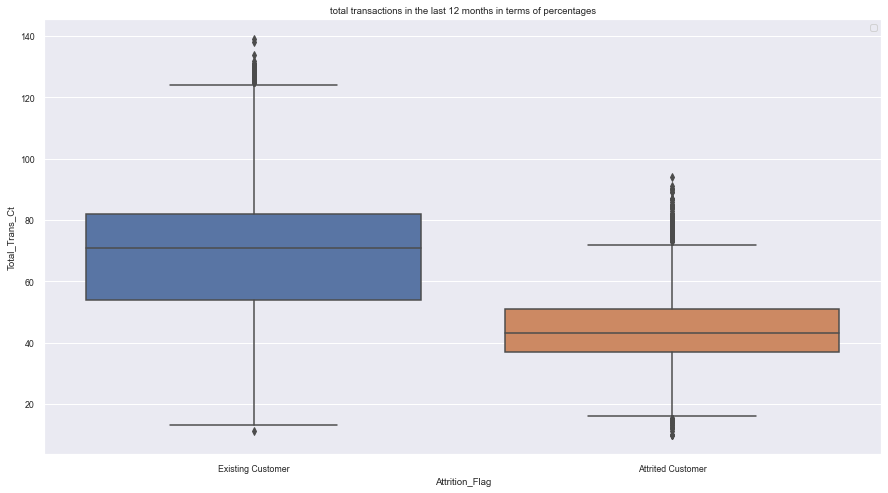

In [247]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Attrition_Flag', y='Total_Trans_Ct', data=bankdata)
plt.title('total transactions in the last 12 months in terms of percentages')
plt.legend();

## Scatter Plot of Total_Trans_Ct vs. Total_Trans_Amt

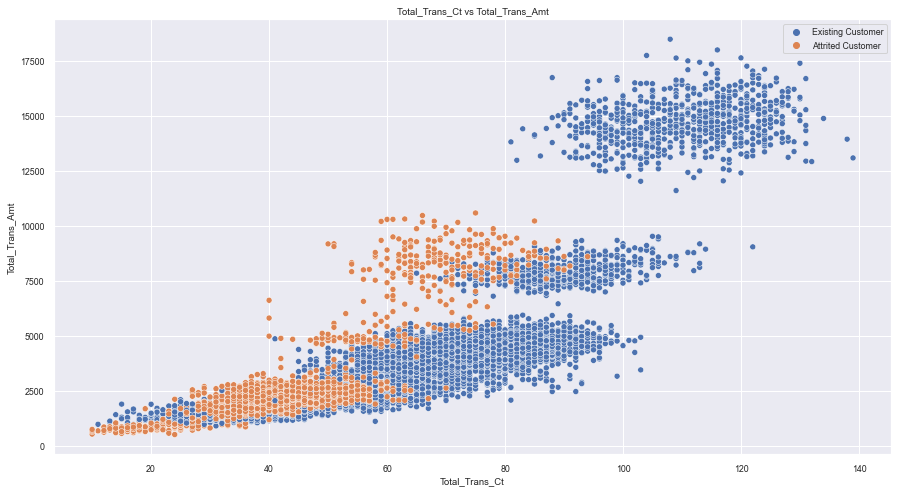

In [248]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=bankdata, x='Total_Trans_Ct', y='Total_Trans_Amt', hue='Attrition_Flag')
plt.title('Total_Trans_Ct vs Total_Trans_Amt')
plt.legend();

## The Number of Existing and Attrited Customers

C:\Users\AORAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


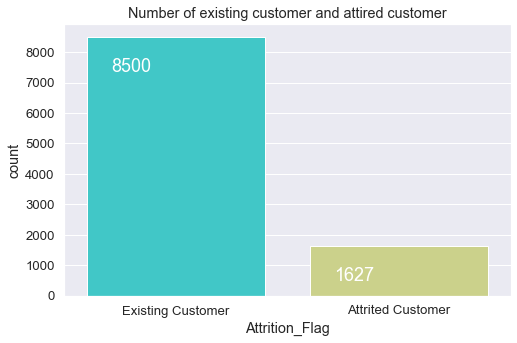

In [249]:
plt.figure(figsize=(8,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')
ax = sns.countplot(bankdata['Attrition_Flag'],palette='rainbow')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.title('Number of existing customer and attired customer');

## Correlation Matrix

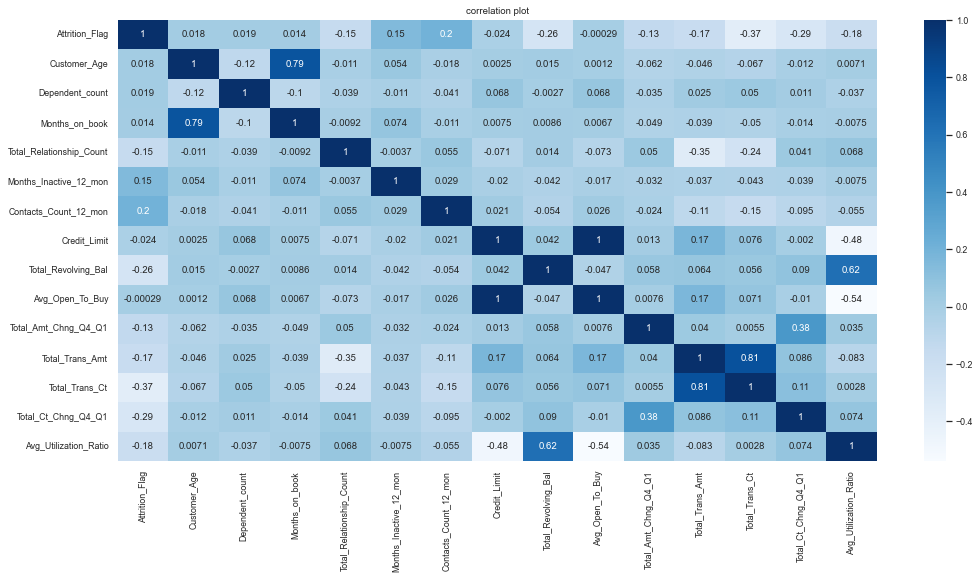

In [258]:
plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(bankdata_treemap.corr(method='pearson'),cmap='Blues',annot=True);
plt.tight_layout()
plt.title('correlation plot');

## K-means Clustering Analysis

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [306]:
features1 = left_customer.loc[:,('Total_Trans_Amt','Total_Trans_Ct')]
features2 = Existing_Customer.loc[:,('Total_Trans_Amt','Total_Trans_Ct')]

In [298]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### K = 3

In [333]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)
features1['clusters'] = clustering_kmeans.fit_predict(features1)
centers = clustering_kmeans.cluster_centers_

C:\Users\AORAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\AORAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


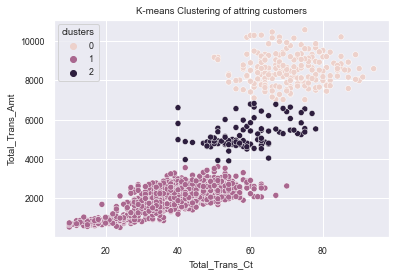

In [335]:
sns.scatterplot(x="Total_Trans_Ct", y="Total_Trans_Amt", hue=features1['clusters'], data=features1)
plt.title('K-means Clustering of attring customers')

plt.show()

### K = 4

C:\Users\AORAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:786: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25). It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\AORAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


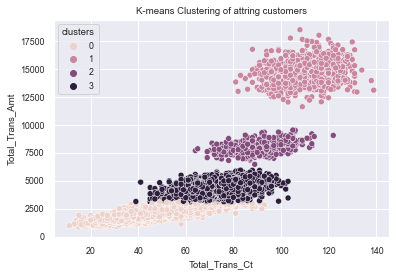

In [336]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
features2['clusters'] = clustering_kmeans.fit_predict(features2)
centers = clustering_kmeans.cluster_centers_
sns.scatterplot(x="Total_Trans_Ct", y="Total_Trans_Amt", hue=features2['clusters'], data=features2)
plt.title('K-means Clustering of attring customers')
plt.show()

# Data Preparation

                    Variable  Type                                        Description
0                  Clientnum   Num  Client number. Unique identifier for the custo...
1             Attrition_Flag  char  Internal event (customer activity) variable - ...
2               Customer_Age   Num     Demographic variable - Customer's Age in Years
3                     Gender  Char            Demographic variable - M=Male, F=Female
4            Dependent_count   Num        Demographic variable - Number of dependents
5            Education_Level  Char  Demographic variable - Educational Qualificati...
6             Marital_Status  Char    Demographic variable - Married, Single, Unknown
7            Income_Category  Char  Demographic variable - Annual Income Category ...
8              Card_Category  Char  Product Variable - Type of Card (Blue, Silver,...
9             Months_on_book   Num              Months on book (Time of Relationship)
10  Total_Relationship_Count   Num         Total no. o

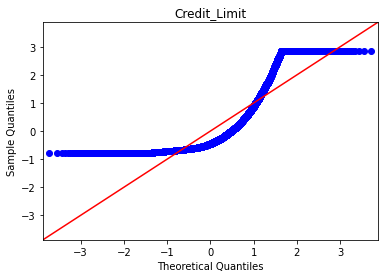

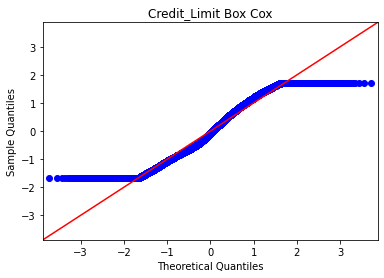

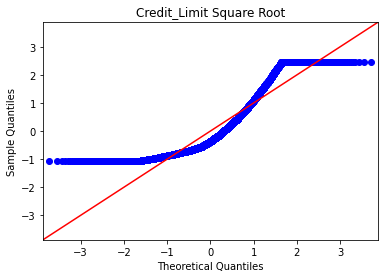

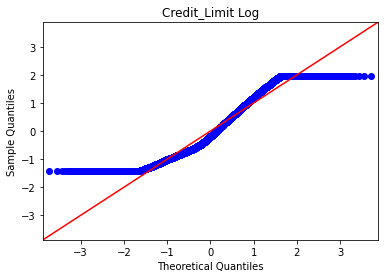

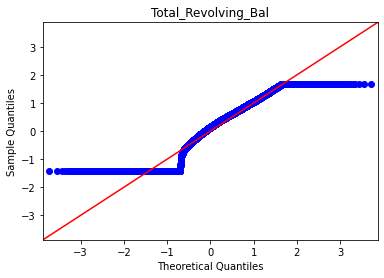

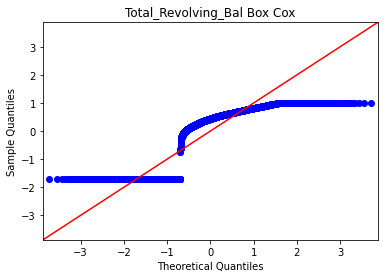

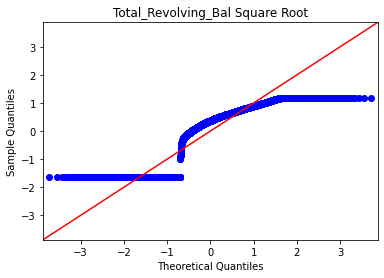

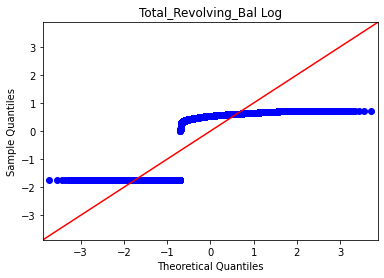

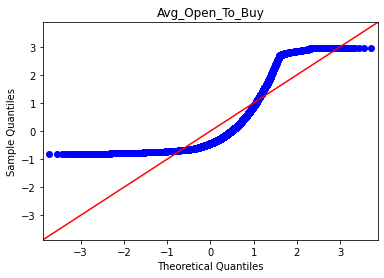

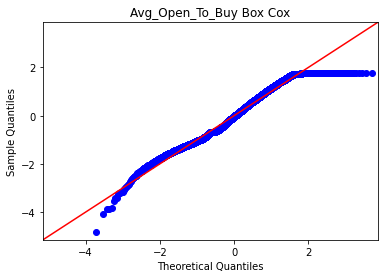

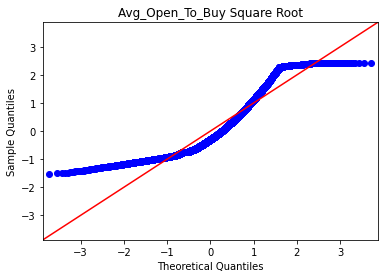

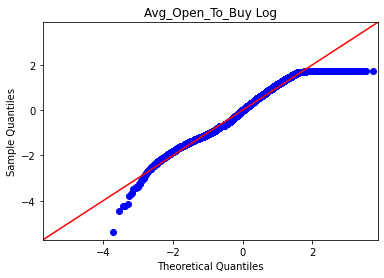

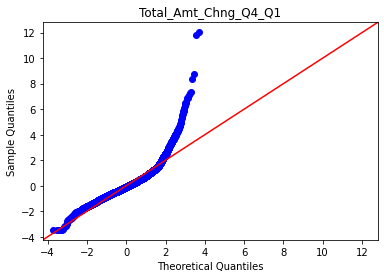

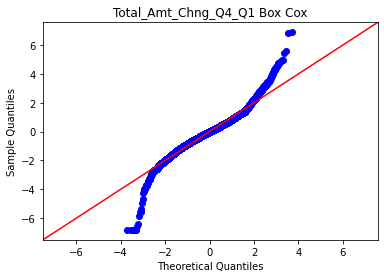

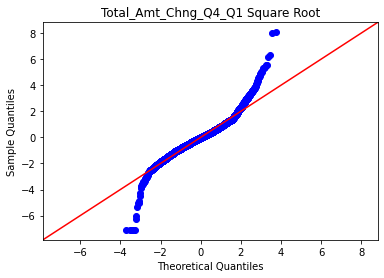

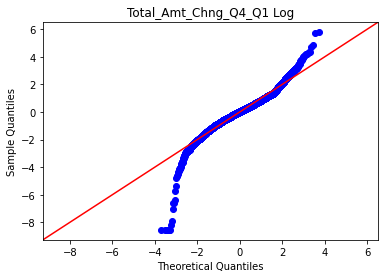

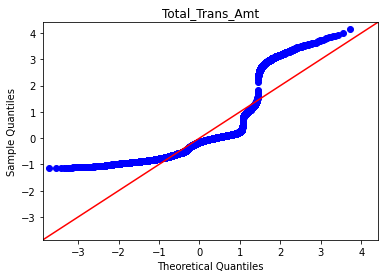

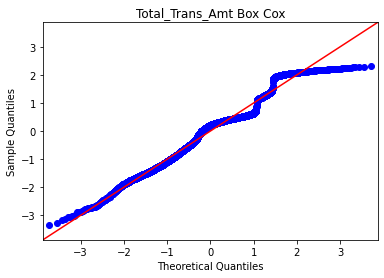

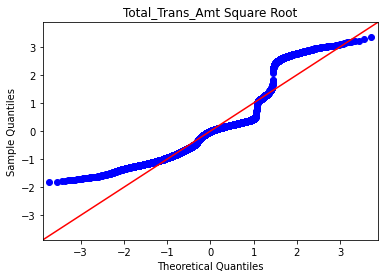

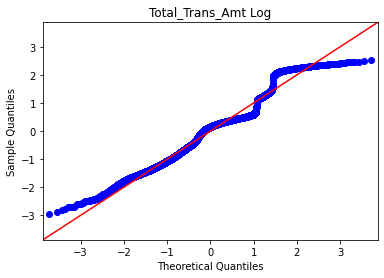

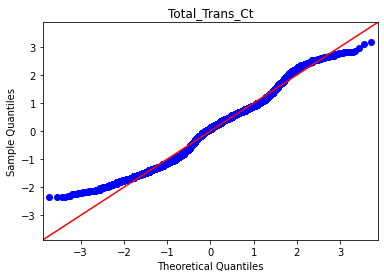

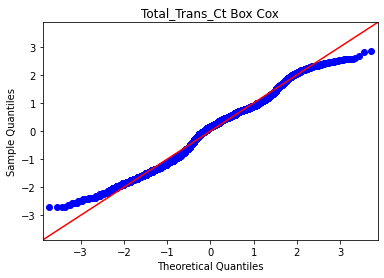

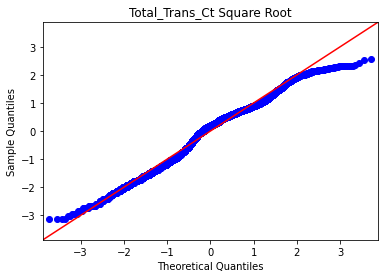

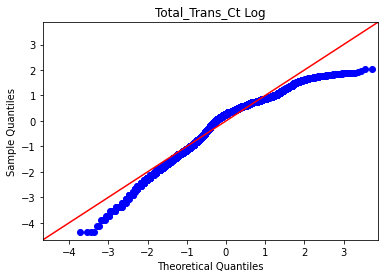

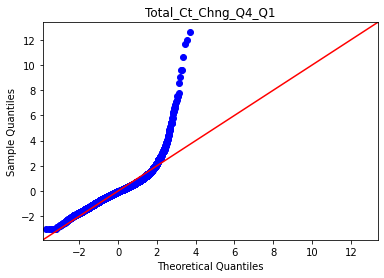

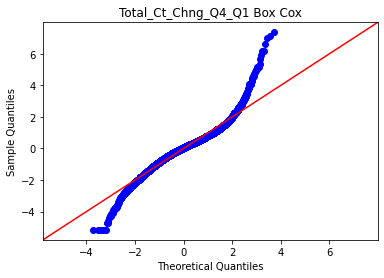

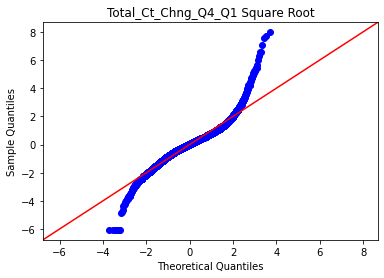

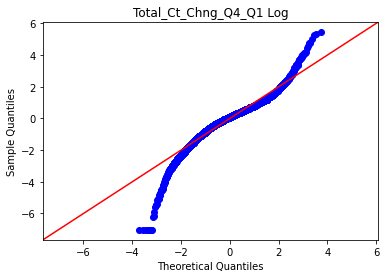

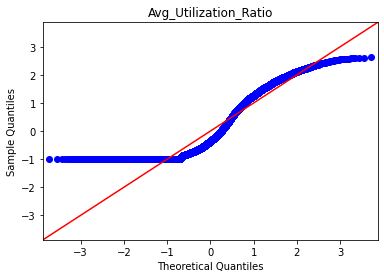

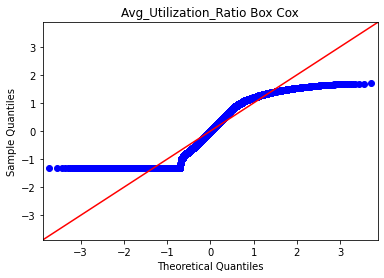

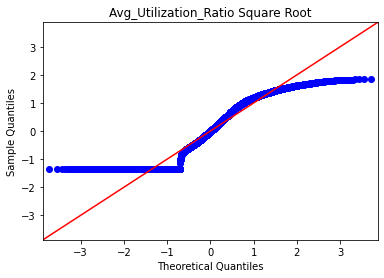

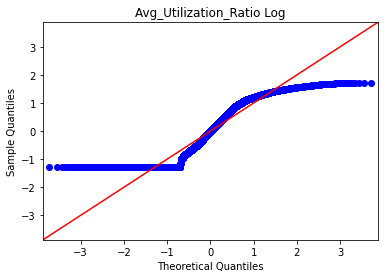

AttributeError: 'Rectangle' object has no property 'ylabel'

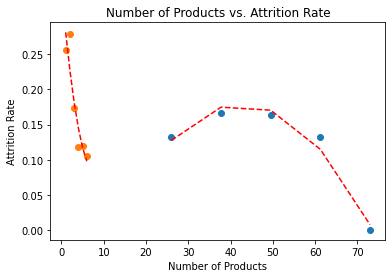

In [15]:
# -*- coding: utf-8 -*-
# =============================================================================
# Importing Packages, Settings
# =============================================================================
import requests as rq
import pandas as pd
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from scipy import stats
import scipy
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

#improving data readability
pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)

#setting random seed
np.random.seed(42)

# =============================================================================
# Column Information
# =============================================================================
url_c=r"https://raw.githubusercontent.com/jentlapalm/Business-Analytics-Final-Project/main/Business%20Analytics%20Group%20Project%20Column%20Names%20-%20Sheet1.csv"
data_c = rq.get(url_c).content
col_info = pd.read_csv(BytesIO(data_c))

print(col_info)

# =============================================================================
# Data Understanding
# Identify and describe the data  
# =============================================================================

#loading data
url=r"https://github.com/jentlapalm/Business-Analytics-Final-Project/raw/main/BankChurners.csv"
data = rq.get(url).content
df = pd.read_csv(BytesIO(data))

#describing data
for i in df.columns:
    print(df[i].describe())

#there are no null values
df.isnull().sum()

# =============================================================================
# Data Preparation: Dummy Variables  
# =============================================================================

#copying df
df_fe=df.copy()
#column names
df.columns
#dropping columns we don't need or will be replaced
df_fe=df_fe.drop(columns=['CLIENTNUM',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                          'Marital_Status',
                          'Card_Category'])

#creating Gender dummy variables
for i in range(10127):
    if df.loc[i,'Gender']=='M':
        df_fe.loc[i,'Gender']=0
    elif df.loc[i,'Gender']=='F':
        df_fe.loc[i,'Gender']=1

#considering dropping Unknowns, but they are 15% of data
sum(df['Education_Level']=='Unknown')

#Attrition_Flag Dummy Variable
att_mapping = {'Existing Customer': 0,'Attrited Customer': 1}
df_fe['Attrition_Flag'] = df['Attrition_Flag'].map(att_mapping)

#Education dummy variable
for i in range(10127):
    if df.loc[i,'Education_Level']=='Unknown':
        df_fe.loc[i,'Education_Level']=0
    elif df.loc[i,'Education_Level']=='Uneducated':
        df_fe.loc[i,'Education_Level']=1
    elif df.loc[i,'Education_Level']=='High School':
        df_fe.loc[i,'Education_Level']=2
    elif df.loc[i,'Education_Level']=='College':
        df_fe.loc[i,'Education_Level']=3
    elif df.loc[i,'Education_Level']=='Graduate':
        df_fe.loc[i,'Education_Level']=4
    elif df.loc[i,'Education_Level']=='Post-Graduate':
        df_fe.loc[i,'Education_Level']=5
    elif df.loc[i,'Education_Level']=='Doctorate':
        df_fe.loc[i,'Education_Level']=6

#Changing Income_Category to dummy variable
for i in range(10127):
    if df.loc[i,'Income_Category']=='Unknown':
        df_fe.loc[i,'Income_Category']=0
    elif df.loc[i,'Income_Category']=='Less than $40K':
        df_fe.loc[i,'Income_Category']=1
    elif df.loc[i,'Income_Category']=='$40K - $60K':
        df_fe.loc[i,'Income_Category']=2
    elif df.loc[i,'Income_Category']=='$60K - $80K':
        df_fe.loc[i,'Income_Category']=3
    elif df.loc[i,'Income_Category']=='$80K - $120K':
        df_fe.loc[i,'Income_Category']=4
    elif df.loc[i,'Income_Category']=='$120K +':
        df_fe.loc[i,'Income_Category']=5   

#Changing Marital_Status to three binary columns
df_fe = pd.concat([df_fe, pd.get_dummies(df['Marital_Status'])], axis=1) 

#Changing Card_Category to four binary columns
df_fe=pd.concat([df_fe, pd.get_dummies(df['Card_Category'])], axis=1)

# =============================================================================
# Data Preparation: Transformations
# =============================================================================

#Transforming Credit_Limit: Box-Cox is winner
x='Credit_Limit'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=np.sqrt(df_fe[x])
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()

#Transforming Total_Revolving_Bal: transformations just make worse
x='Total_Revolving_Bal'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=np.sqrt(df_fe[x])
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()

#Transforming Avg_Open_To_Buy: Box-Cox is winner
x='Avg_Open_To_Buy'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=np.sqrt(df_fe[x])
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()

#Transforming Total_Amt_Chng_Q4_Q1: Box-Cox slight improvement
x='Total_Amt_Chng_Q4_Q1'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=(np.sqrt(df_fe[x]))
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()
    
#Transforming Total_Trans_Amt: Box-Cox is winner
x='Total_Trans_Amt'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=(np.sqrt(df_fe[x]))
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()

#Transforming Total_Trans_Ct: Square Root is winner
x='Total_Trans_Ct'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=(np.sqrt(df_fe[x]))
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()
    
#Transforming Total_Ct_Chng_Q4_Q1: there is no clear fix
x='Total_Ct_Chng_Q4_Q1'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=(np.sqrt(df_fe[x]))
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()

#Transforming Avg_Utilization_Ratio: there is no clear fix
x='Avg_Utilization_Ratio'
xbc,_=boxcox(df_fe[x]+0.1)
xsqrt=(np.sqrt(df_fe[x]))
xlog=np.log(df_fe[x]+0.1)
for i, g in zip([df_fe[x],xbc,xsqrt,xlog], [x,x+' Box Cox',x+' Square Root',x+' Log']):
    sm.qqplot(i, line ='45',fit=True)
    plt.title(g)
    plt.show()

#Performing transformations
# Transforming Credit_Limit: Box-Cox 
df_fe['Credit_Limit'],_=boxcox(df['Credit_Limit'])
# Transforming Avg_Open_To_Buy: Box-Cox 
df_fe['Avg_Open_To_Buy'],_=boxcox(df['Avg_Open_To_Buy'])
# Transforming Total_Amt_Chng_Q4_Q1: Box-Cox 
df_fe['Total_Amt_Chng_Q4_Q1'],_=boxcox(df['Total_Amt_Chng_Q4_Q1']+0.1)
# Transforming Total_Trans_Amt: Box-Cox 
df_fe['Total_Trans_Amt'],_=boxcox(df['Total_Trans_Amt'])
# Transforming Total_Trans_Ct: Square Root 
df_fe['Total_Trans_Ct']=np.sqrt(df['Total_Trans_Ct'])

# =============================================================================
# Data Preparation: Feature Interactions
# =============================================================================

#check churn probability by age bracket, gender, education level

#Gender Churn?
x=df_fe[['Gender','Attrition_Flag']][df_fe['Gender']==1]
sum(x.Attrition_Flag)/len(x.Gender) #17% women churn

y=df_fe[['Gender','Attrition_Flag']][df_fe['Gender']==0]
sum(y.Attrition_Flag)/len(y.Gender) #14% of men churn

#Education Churn?
e=df_fe[['Attrition_Flag','Education_Level']].groupby('Education_Level')
e.sum()/e.count()

#Age Churn? (customers are 26 to 73)
age=[]
churn=[]
for i in np.linspace(26,73,5):
    age.append(round(i,2))
    a=df_fe[['Attrition_Flag','Customer_Age']].where(df_fe['Customer_Age'].between(i,i+9.4))
    x=a.sum()/a.count()
    churn.append(round(x.Attrition_Flag,4))
#charting graph of age vs. churn
plt.scatter(age,churn)
z = np.polyfit(age, churn, 2)
p = np.poly1d(z)
plt.plot(age,p(age),"r--")
plt.title('Age vs. Attrition Rate')
plt.xlabel('Age')
plt.ylabel('Attrition Rate')

#Num products churn?
p=df_fe[['Attrition_Flag','Total_Relationship_Count']].groupby('Total_Relationship_Count').agg('mean')
#visualizing results
plt.scatter(p.index,p.Attrition_Flag)
z = np.polyfit(p.index, p.Attrition_Flag, 2)
pp = np.poly1d(z)
plt.plot(p.index,pp(p.index),"r--")
plt.title('Number of Products vs. Attrition Rate')
plt.xlabel('Number of Products')
plt.ylabel('Attrition Rate')

#Dummy Variable for High Risk Customers
for i in range(10127):
    if ((df_fe.loc[i,'Total_Relationship_Count']<=2) and (df_fe.loc[i,'Customer_Age']>=35) and (df_fe.loc[i,'Customer_Age']<=55)):
        df_fe.loc[i,'High_Risk']=1
    else:
        df_fe.loc[i,'High_Risk']=0

#new var attrition rates
hr=df_fe[['Attrition_Flag','High_Risk']].groupby('High_Risk').agg('mean').unstack()

#visualizing High Risk
color=['tab:blue','orange']
xlabs2=['Nonlabelled','High Risk']
ax=hr.plot(kind='bar', title='Comparison of High Risk Feature', ylabel='Attrition Rate',
         xlabel='', color=color, legend=None)
ax.set_xticklabels(xlabs2, rotation=45)
plt.show()


# =============================================================================
# Data Preparation: Scaling, Balancing, Feature Selection, Exporting
# =============================================================================

#Scaling attributes
col_names=pd.Index.tolist(df_fe.columns)
col_names.remove('Attrition_Flag')
ct = ColumnTransformer([('attributes', StandardScaler(), col_names)], remainder='drop')
df_fe[col_names]=ct.fit_transform(df_fe)

#Balancing Target Variable
# Number of class 1 samples before
X_imb=df_fe.loc[:,col_names]
y_imb=df_fe['Attrition_Flag']
print('Number of class 1 (Attrition) samples before:', X_imb[y_imb == 1].shape[0])
X_upsampled, y_upsampled = resample(X_imb[y_imb == 1], # Indexable data-structures as input
                                    y_imb[y_imb == 1],
                                    replace=True,      # Implements resampling with replacement.
                                    n_samples=X_imb[y_imb == 0].shape[0], # Number of samples to generate
                                    random_state=42) # The seed of the pseudo random number generator to use when shuffling the data

# Number of class 1 samples after 
print('Number of class 1 (Attrition_Flag) samples after:', X_upsampled.shape[0])
# Stacking resampled data with original
X_bal=pd.concat([X_imb[y_imb == 0],X_upsampled])
y_bal=pd.concat([y_imb[y_imb == 0],y_upsampled])

bank_data=X_bal
bank_data['Attrition_Flag']=y_bal
bank_data.info()

X_bal=X_bal.drop(columns='Attrition_Flag')

#feature selection
names = pd.Index.tolist(X_bal.columns)
 
#use linear regression as the model
lr = LinearRegression()
#rank all features
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X_bal,y_bal)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

#exporting to csv
bank_data.to_csv(r"v")

# =============================================================================
# Visulizations for Slides
# =============================================================================
import matplotlib
matplotlib.style.use('ggplot')

#plotting education level changes
edu=df['Education_Level'].groupby(df['Education_Level']).count()

edu.plot(kind='bar', title='Education Level', ylabel='Number of Customers',
         xlabel='', figsize=(6, 5), rot=45, color='tab:blue')


edu2=df_fe['Education_Level'].groupby(df_fe['Education_Level']).count()
xlabs=['Unknown','Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']

fig, ax = plt.subplots()
edu2.plot(kind='bar', title='Education Level', ylabel='Number of Customers',
         xlabel='', figsize=(6, 5), rot=45, color='tab:blue')
ax.set_xticklabels(xlabs)
plt.show()

#binary and dummy variable changes
df[['Attrition_Flag']]
df_fe[['Attrition_Flag']]

df[['Marital_Status']]
df_fe[['Married','Single','Divorced','Unknown']]

#Total Transactions before & After Normalizing
df['Total_Trans_Ct'].plot(kind='hist', title='Before\nTotal Transaction Count', bins=30, ec='white', color='tab:blue')

scaled_features = (df.Total_Trans_Ct-np.mean(df.Total_Trans_Ct))/np.std(df.Total_Trans_Ct)

scaled_features.plot(kind='hist', title='After\nTotal Transaction Count', bins=30, ec='white', color='tab:blue')

#balancing attrition flag
dfb=df.copy()
att_mapping = {'Existing Customer': 0,'Attrited Customer': 1}
dfb['Attrition_Flag'] = df['Attrition_Flag'].map(att_mapping)

xlabs3=['Retention','Attrition']
dfbp=dfb.Attrition_Flag.groupby(dfb['Attrition_Flag']).agg('count')
ax=dfbp.plot(kind='bar', title='Original Attrition Distribution', color=['tab:blue','red'],xlabel='')
ax.set_xticklabels(xlabs3, rotation=45)
plt.show()

xlabs3=['Retention','Attrition']
df_bal=bank_data.Attrition_Flag.groupby(bank_data['Attrition_Flag']).agg('count')
ax=df_bal.plot(kind='bar', title='Balanced Attrition Distribution', color=['tab:blue','red'],xlabel='')
ax.set_xticklabels(xlabs3, rotation=45)
plt.show()

#Cool Feature Selection Viz From Notebook:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)
    
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')
lr = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1', C=1.0)
lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', multi_class='ovr', penalty='l1', C=10.**c, random_state=42)
    lr.fit(X_train, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=bank_data.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.title('Logistic Regression Feature Selection')
plt.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
plt.show()

